In [1]:
%pip install scikit-learn-intelex
# Patch scikit-learn for faster processing
from sklearnex import patch_sklearn
patch_sklearn()

Note: you may need to restart the kernel to use updated packages.


Intel(R) Extension for Scikit-learn* enabled (https://github.com/uxlfoundation/scikit-learn-intelex)


In [2]:
import sys
from pathlib import Path

# Resolve current working directory (for notebooks)
project_root = Path().resolve()

# Walk up until 'src/' is found
while not (project_root / 'src').exists() and project_root != project_root.parent:
    project_root = project_root.parent

# Add to Python path
sys.path.append(str(project_root))

print("Project root set to:", project_root)


Project root set to: C:\Users\jonat\fraud-detection-project


In [3]:
import pandas as pd
import joblib
from pathlib import Path

from src.training import train_and_evaluate
from src.data_loader import load_smote_data


In [4]:
# Paths
project_root = Path.cwd().parents[0]
processed_dir = project_root / "data" / "processed"
model_dir = project_root / "models" / "trained_model"

In [5]:
# If path does not exist, create it
if not model_dir.exists():
    model_dir.mkdir(parents=True)

In [6]:
# Load feature columns
feature_columns = joblib.load(processed_dir / "feature_columns.pkl")
print("Loaded feature column names:", feature_columns[:5], "...")

Loaded feature column names: ['TransactionDT', 'TransactionAmt', 'card1', 'card2', 'card3'] ...


In [7]:
# Load features
X_bal = pd.read_csv(processed_dir / "X_smote.csv", header=0)
feature_columns = joblib.load(processed_dir / "feature_columns.pkl")
X_bal.columns = feature_columns

y_bal = pd.read_csv(processed_dir / "y_smote.csv", header=0).squeeze("columns")
y_bal = pd.to_numeric(y_bal, errors="coerce").dropna().astype(int).reset_index(drop=True)



In [8]:
min_len = min(len(X_bal), len(y_bal))
X_bal = X_bal.iloc[:min_len].reset_index(drop=True)
y_bal = y_bal.iloc[:min_len].reset_index(drop=True)

print("Adjusted shapes for consistency:")
print("X_bal shape:", X_bal.shape)
print("y_bal shape:", y_bal.shape)

Adjusted shapes for consistency:
X_bal shape: (1139754, 357)
y_bal shape: (1139754,)


In [9]:
preprocessor = joblib.load(processed_dir / "preprocessor.pkl")
print("Preprocessor loaded.")

Preprocessor loaded.



 Training RandomForest...
RandomForest trained in 330.89 seconds

=== RandomForest Results ===
Classification Report:
              precision    recall  f1-score   support

           0       0.99      1.00      0.99    113976
           1       1.00      0.99      0.99    113975

    accuracy                           0.99    227951
   macro avg       0.99      0.99      0.99    227951
weighted avg       0.99      0.99      0.99    227951

ROC AUC Score: 0.9993466867485508

 Training XGBoost...


c:\Users\jonat\anaconda3\Lib\site-packages\xgboost\training.py:183: UserWarning: [14:19:35] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


XGBoost trained in 60.60 seconds

=== XGBoost Results ===
Classification Report:
              precision    recall  f1-score   support

           0       0.97      1.00      0.98    113976
           1       1.00      0.97      0.98    113975

    accuracy                           0.98    227951
   macro avg       0.98      0.98      0.98    227951
weighted avg       0.98      0.98      0.98    227951

ROC AUC Score: 0.9969349011000773

 Training LogisticRegression...
LogisticRegression trained in 1555.43 seconds

=== LogisticRegression Results ===
Classification Report:
              precision    recall  f1-score   support

           0       0.76      0.82      0.79    113976
           1       0.81      0.74      0.77    113975

    accuracy                           0.78    227951
   macro avg       0.79      0.78      0.78    227951
weighted avg       0.79      0.78      0.78    227951

ROC AUC Score: 0.8646855567642929

 Training GradientBoosting...
GradientBoosting trained in 

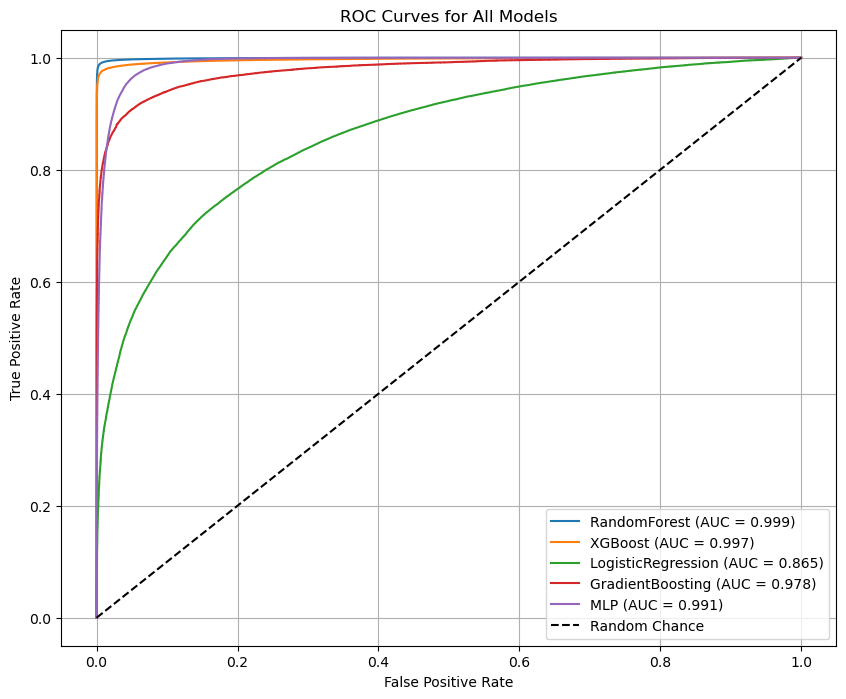

All models and preprocessor saved.


In [10]:
train_and_evaluate(X_bal, y_bal, preprocessor, model_dir)